In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy

# My Tools
from toolkit.tools import print_column_uniques, make_df, get_column_uniques, explode_pie


%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [12, 7]

In [3]:
sns.set()

In [4]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [5]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

In [6]:
# Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (255 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)

# Modalidad
---
- Modalidad de trabajo de los encuestados.

## GENERAL

In [7]:
# Cantidad de respuestas.
df["modalidad"].shape

(342,)

In [8]:
# Conteo de respuestas vacias.
df["modalidad"].isna().sum()

0

In [9]:
df["modalidad"].value_counts()

Remoto        145
Hibrído       110
Presencial     78
Ninguna         9
Name: modalidad, dtype: int64

In [10]:
df["modalidad"].value_counts(normalize=True)

Remoto        0.423977
Hibrído       0.321637
Presencial    0.228070
Ninguna       0.026316
Name: modalidad, dtype: float64

<AxesSubplot: title={'center': 'Modalidad de Trabajo'}>

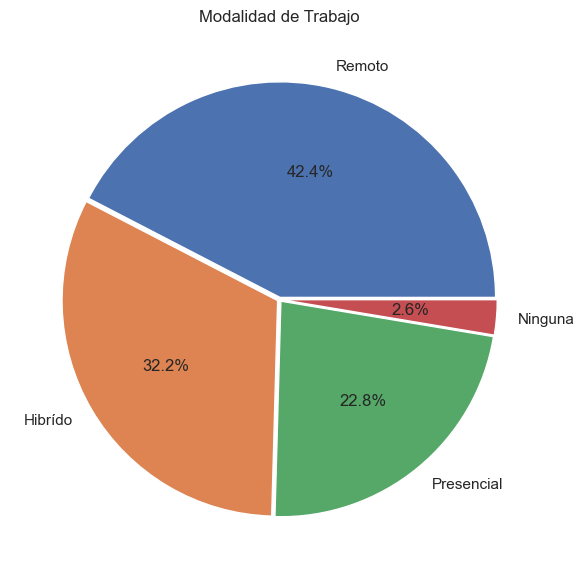

In [11]:
df["modalidad"].value_counts(normalize=True).plot(
    kind="pie",
    title="Modalidad de Trabajo",
    explode=(0.01, 0.01, 0.01, 0.01),
    autopct="%1.1f%%",
    ylabel="",
)

In [12]:
df["modalidad"].value_counts().keys()

Index(['Remoto', 'Hibrído', 'Presencial', 'Ninguna'], dtype='object')

# Modalidad de trabajo por genero.
---

In [13]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [14]:
generos = df.groupby("genero")

## Genero no definido.

In [15]:
generos.get_group("NO COMPARTO")["modalidad"].value_counts(normalize=True)

Remoto     0.666667
Hibrído    0.166667
Ninguna    0.166667
Name: modalidad, dtype: float64

<AxesSubplot: title={'center': 'Modalidad de trabajo. (GENERO -> NO DEFINIDO)'}>

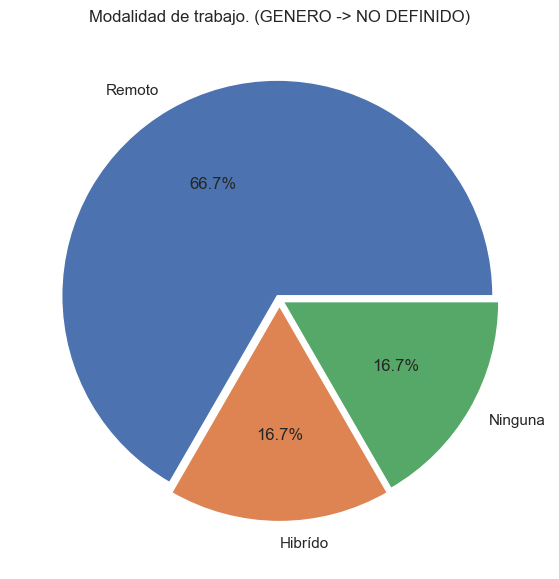

In [16]:
generos.get_group("NO COMPARTO")["modalidad"].value_counts(normalize=True).plot(
    kind="pie",
    autopct="%1.1f%%",
    explode=(0.02, 0.03, 0.02),
    label="",
    title="Modalidad de trabajo. (GENERO -> NO DEFINIDO)",
)

## Hombres

In [17]:
generos.get_group("HOMBRE")["modalidad"].value_counts(normalize=True)

Remoto        0.419355
Hibrído       0.336918
Presencial    0.215054
Ninguna       0.028674
Name: modalidad, dtype: float64

<AxesSubplot: title={'center': 'Modalidad de trabajo. (GENERO -> HOMBRE)'}>

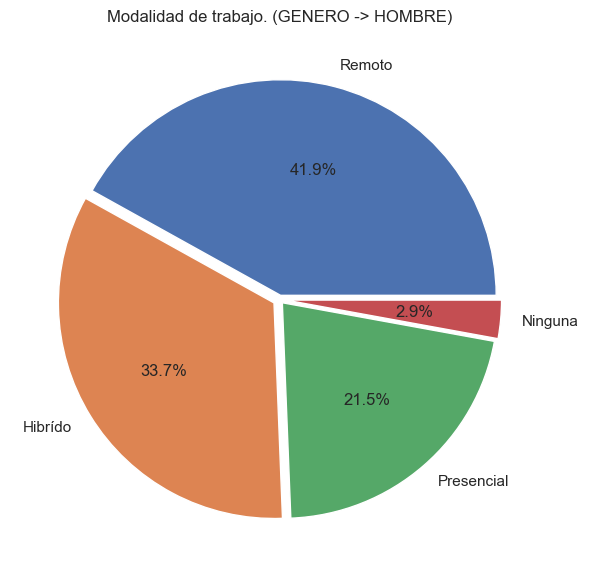

In [18]:
generos.get_group("HOMBRE")["modalidad"].value_counts(normalize=True).plot(
    kind="pie",
    explode=(0.02, 0.03, 0.02, 0.03),
    autopct="%1.1f%%",
    label="",
    title="Modalidad de trabajo. (GENERO -> HOMBRE)",
)

## Mujer

In [19]:
generos.get_group("MUJER")["modalidad"].value_counts(normalize=True)

Remoto        0.408163
Presencial    0.367347
Hibrído       0.224490
Name: modalidad, dtype: float64

<AxesSubplot: title={'center': 'Modalidad de trabajo. (GENERO -> MUJER)'}>

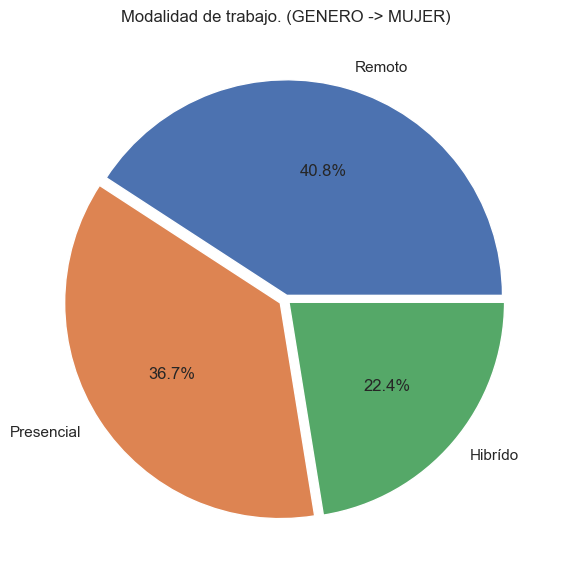

In [20]:
generos.get_group("MUJER")["modalidad"].value_counts(normalize=True).plot(
    kind="pie",
    explode=(0.02, 0.03, 0.02),
    label="",
    autopct="%1.1f%%",
    title="Modalidad de trabajo. (GENERO -> MUJER)",
)

## COMPARATIVA TODOS LOS GENEROS

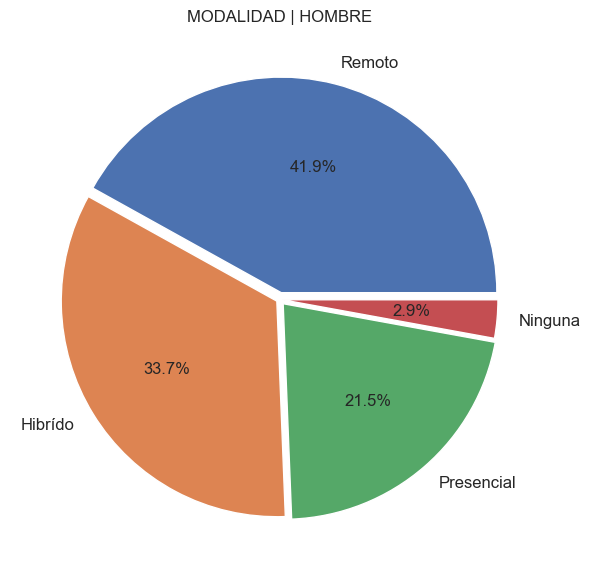

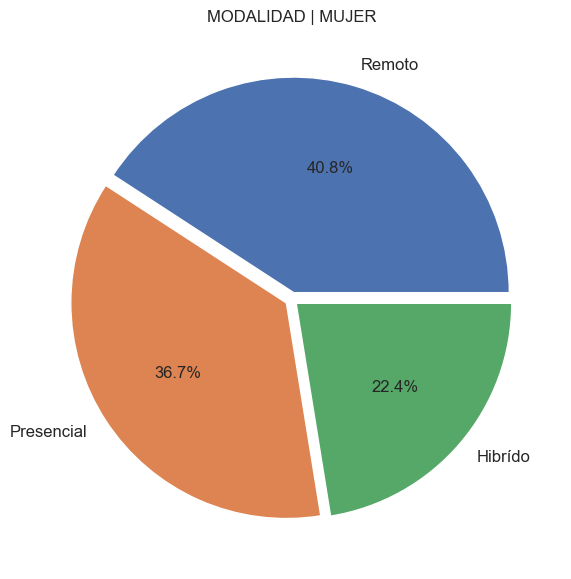

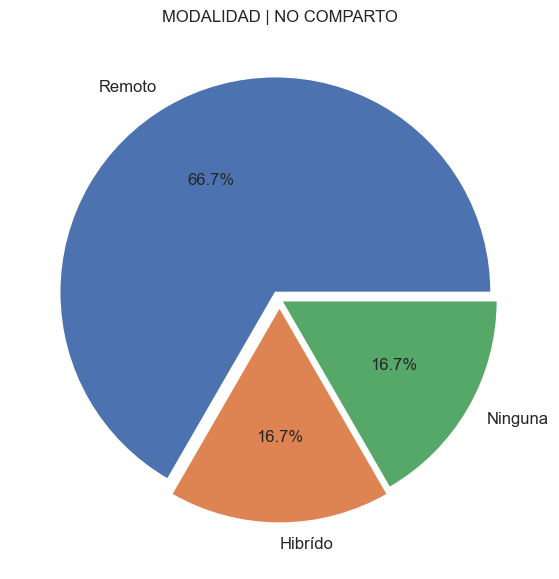

In [21]:
# plt.figure(figsize=(10, 30), dpi=80)

for k, v in enumerate(generos.groups.keys()):
    # plt.subplot(8, 2, k + 1)
    aux_df = generos.get_group(v)["modalidad"].value_counts(normalize=True)
    aux_df.plot(
        kind="pie",
        title="MODALIDAD | {0}".format(v),
        # color=color_neutro_dark,
        ylabel="",
        autopct="%1.1f%%",
        textprops={"fontsize": 12},
        explode=explode_pie(aux_df.size),
    )
    plt.show()

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Modalida de Trabajo por edad
---

In [22]:
edades = df.groupby("edad_actual")

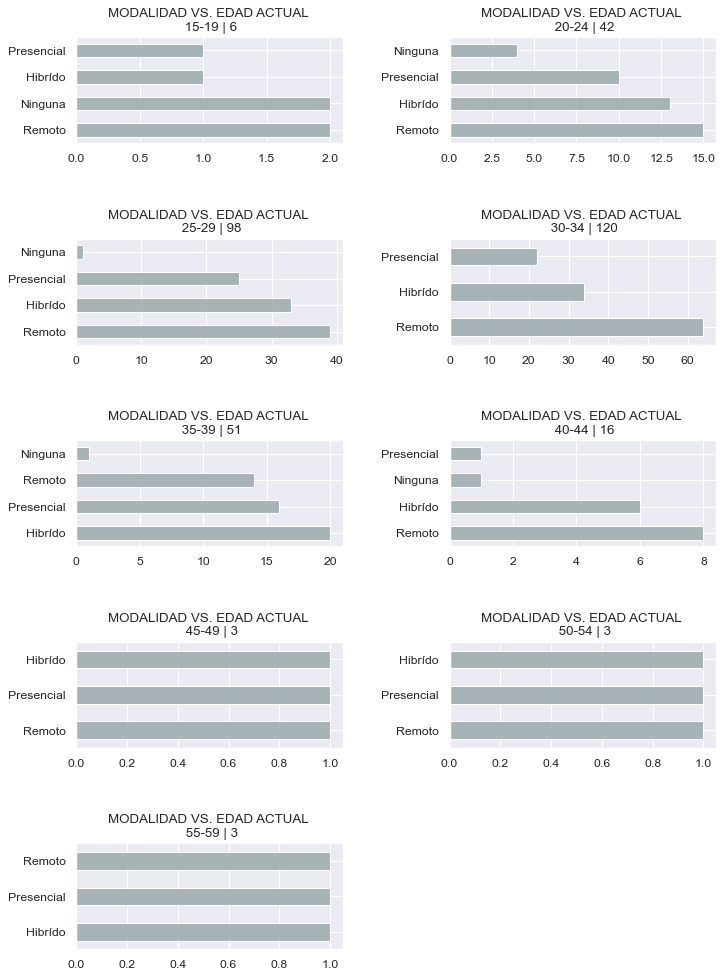

In [23]:
plt.figure(figsize=(10, 30), dpi=80)

for k, v in enumerate(edades.groups.keys()):
    plt.subplot(10, 2, k + 1)
    edades.get_group(v)["modalidad"].value_counts().plot(
        kind="barh",
        title="MODALIDAD VS. EDAD ACTUAL \n {0} | {1}".format(
            v, edades.get_group(v).shape[0]
        ),
        color=color_neutro_dark,
    )

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.9)

# Modalidad segun Salario mensual
---

In [24]:
salarios = df.groupby("salario_mensual")

In [25]:
def absolute_value(val):
    a = numpy.round(val / 100.0 * sizes.sum(), 0)
    return a

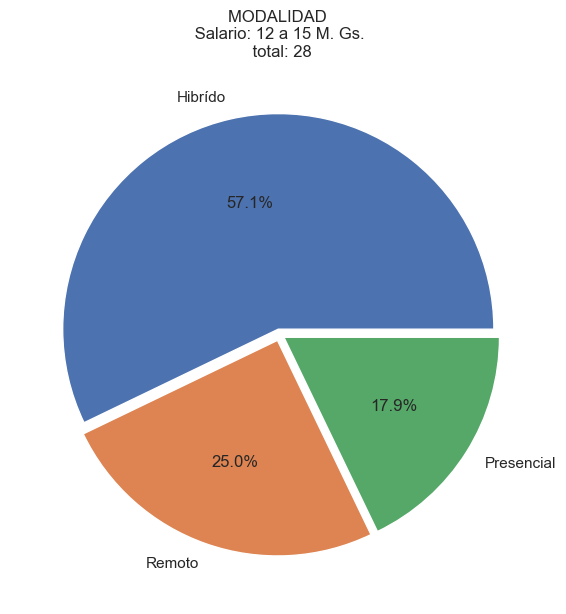

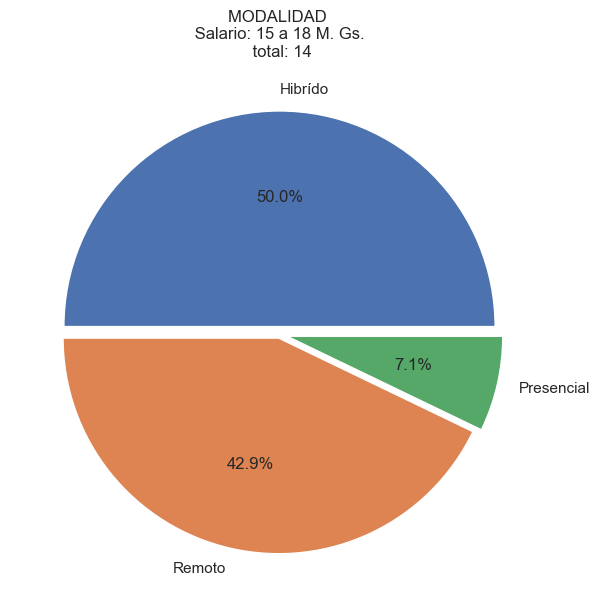

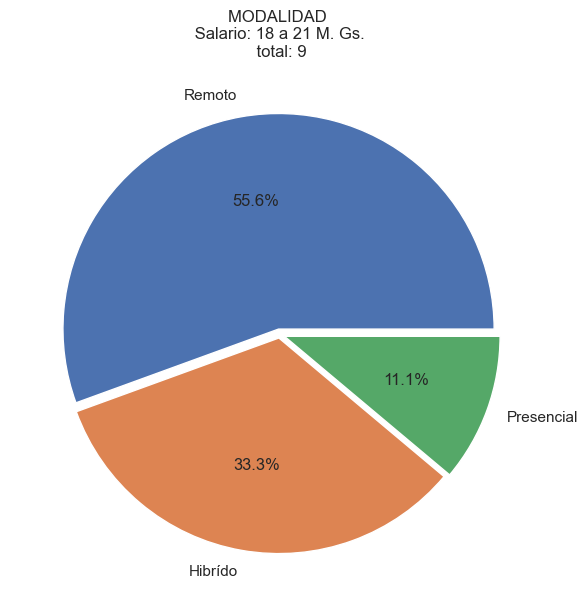

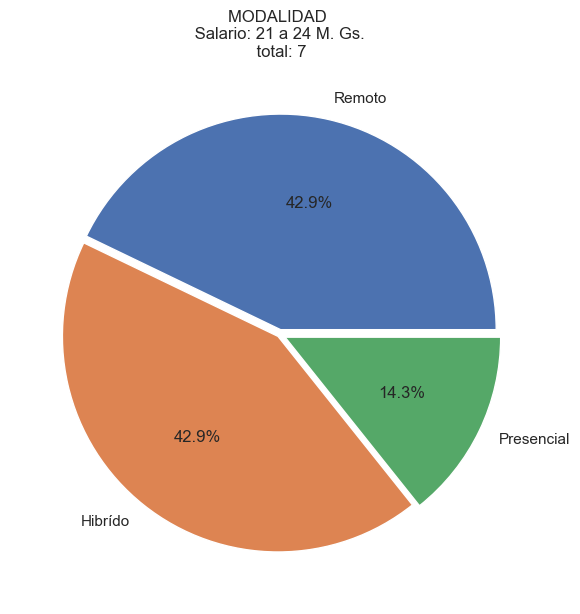

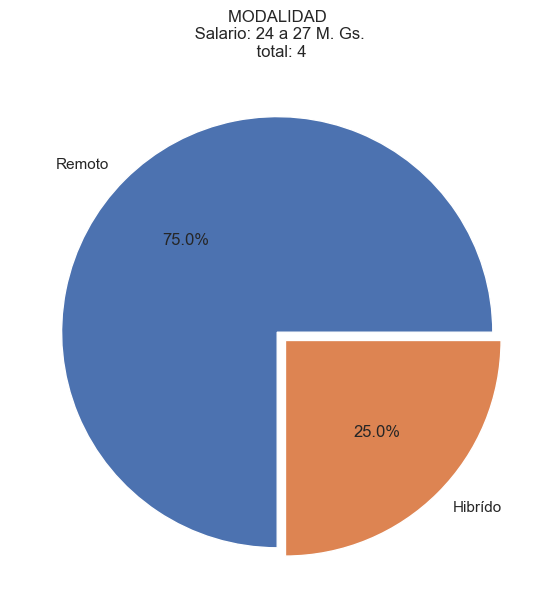

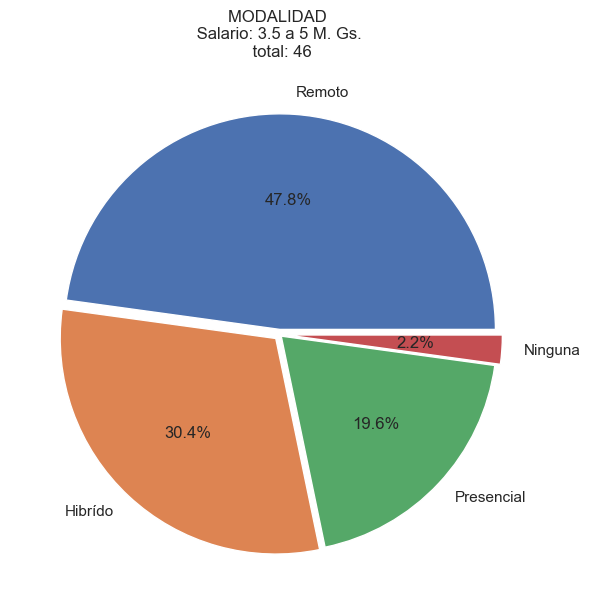

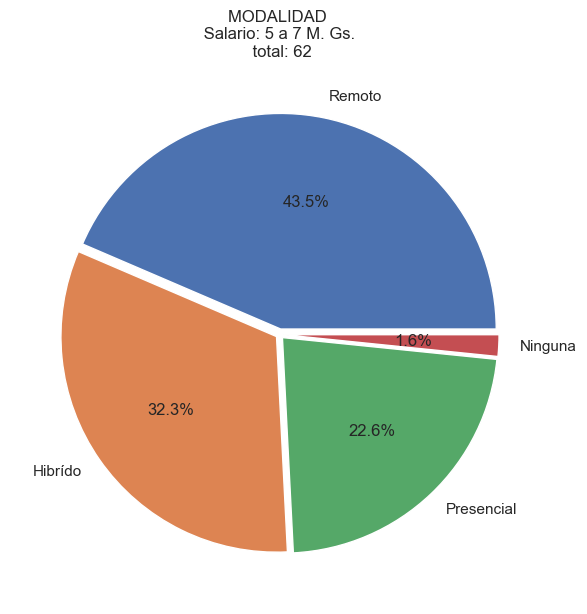

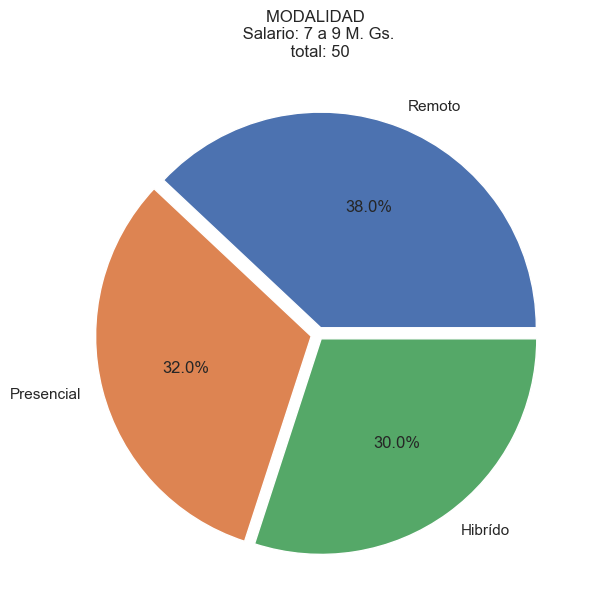

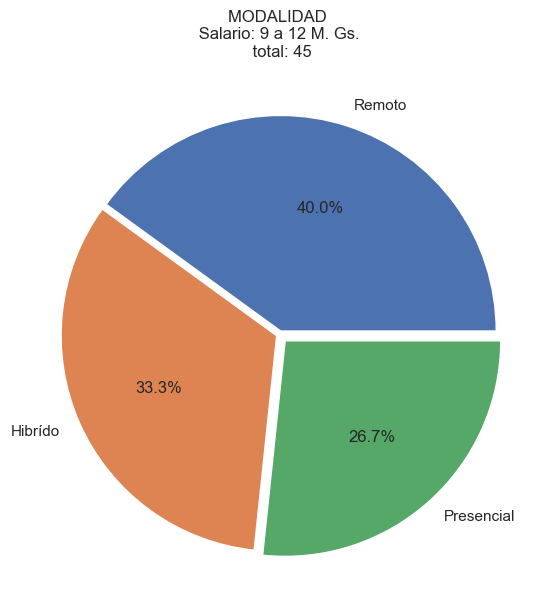

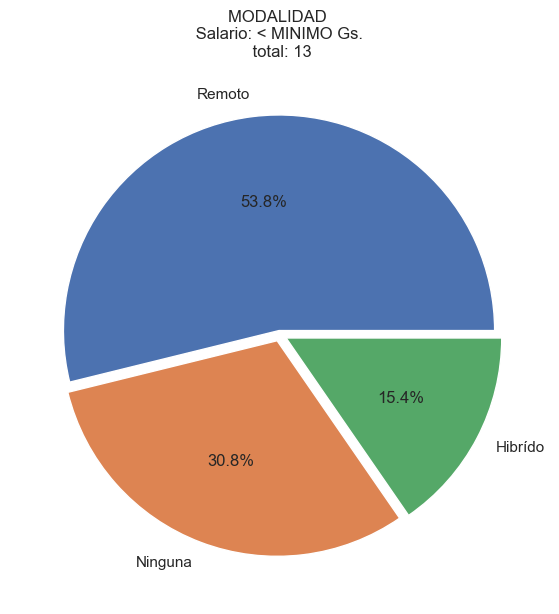

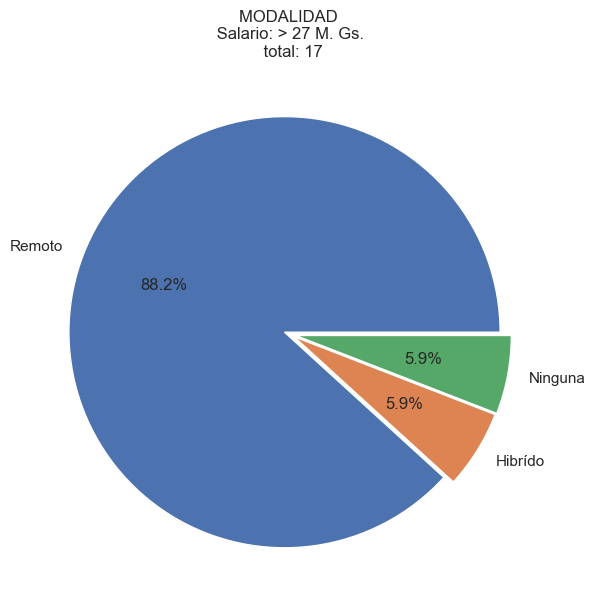

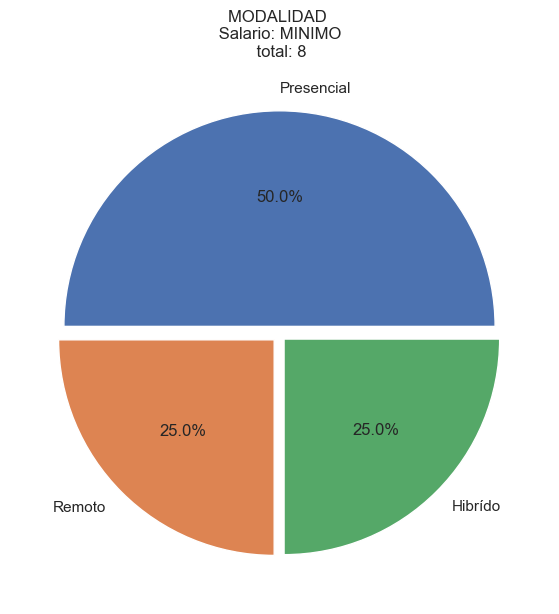

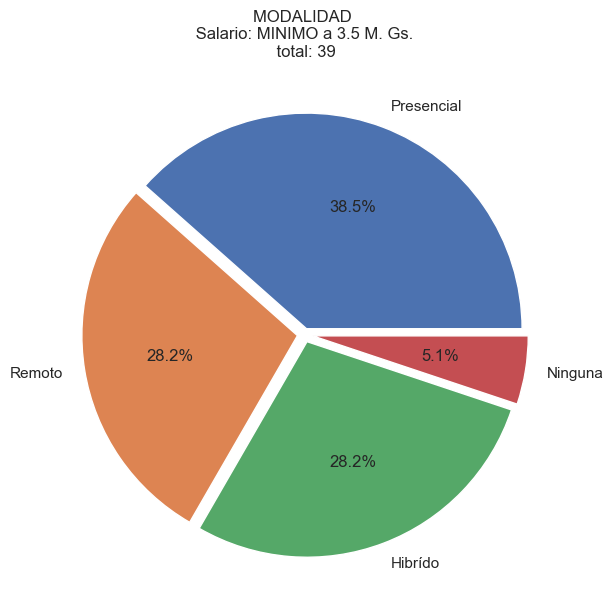

In [26]:
# plt.figure(figsize=(10, 30), dpi=80)

for k, v in enumerate(salarios.groups.keys()):
    # plt.subplot(10, 2, k + 1)
    aux_df = salarios.get_group(v)["modalidad"].value_counts(normalize=True)
    aux_df.plot(
        kind="pie",
        ylabel="",
        autopct="%1.1f%%",
        title="MODALIDAD \n Salario: {0} \n total: {1}".format(
            v, salarios.get_group(v).shape[0]
        ),
        explode=explode_pie(aux_df.size)
        # color=color_neutro_dark
    )
    plt.show()

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.4)

# Modalidad de Trabajo segun Educacion

In [27]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [28]:
edu_df = make_df(df, "educacion", "category", "counts")

<AxesSubplot: title={'center': 'Educacion'}>

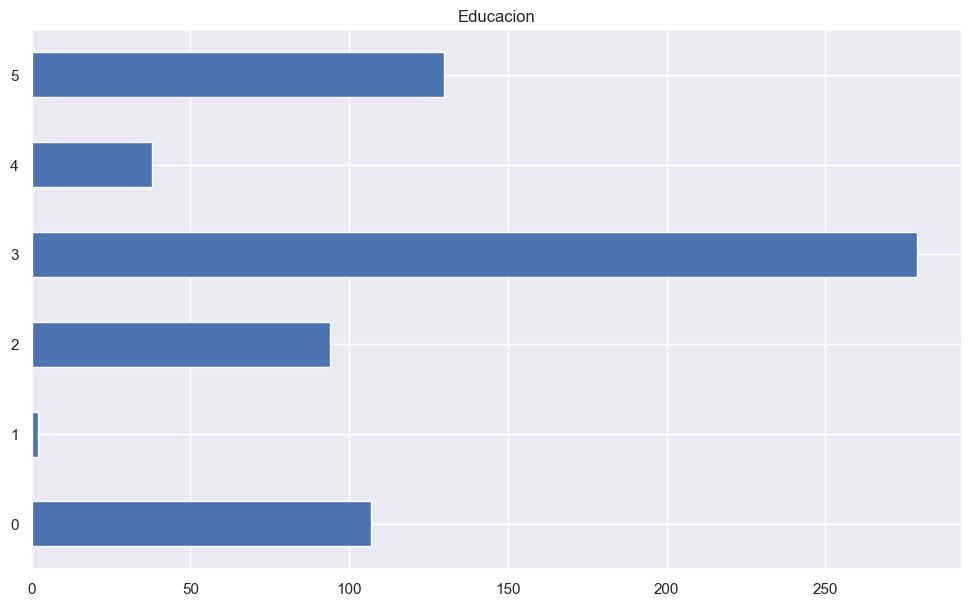

In [29]:
edu_df.plot(kind="barh", title="Educacion", legend=False)

In [30]:
ed_uniques = get_column_uniques(df, "educacion")

In [31]:
ed_uniques

['Ed. Basica',
 'Doctorado',
 'Autodidacta',
 'Ed. Universitaria',
 'Master',
 'Ed. Secundaria']

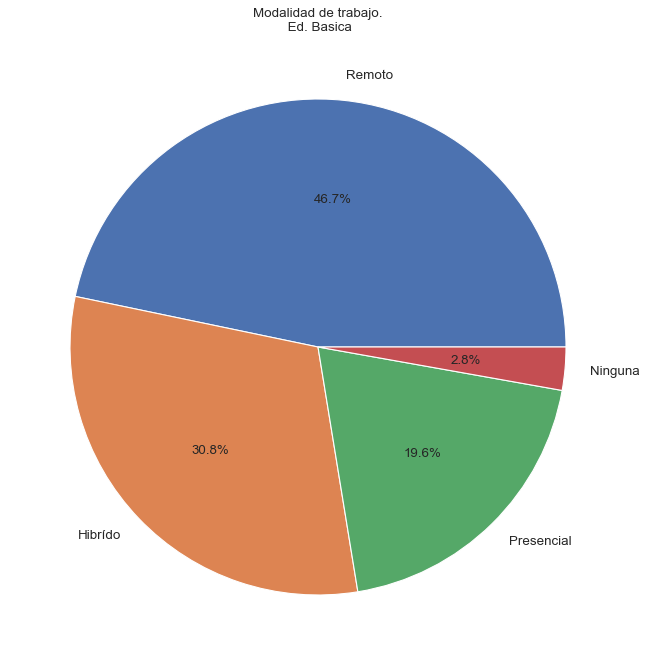

Educacion vs Modalidad - Ed. Basica
Remoto        0.467290
Hibrído       0.308411
Presencial    0.196262
Ninguna       0.028037
Name: modalidad, dtype: float64








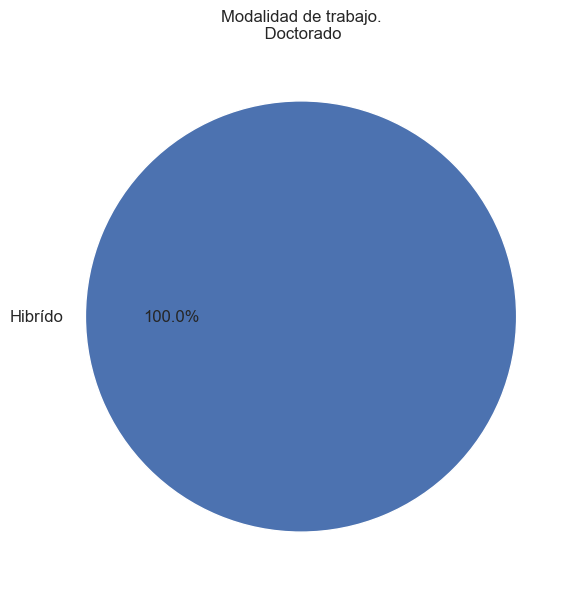

Educacion vs Modalidad - Doctorado
Hibrído    1.0
Name: modalidad, dtype: float64








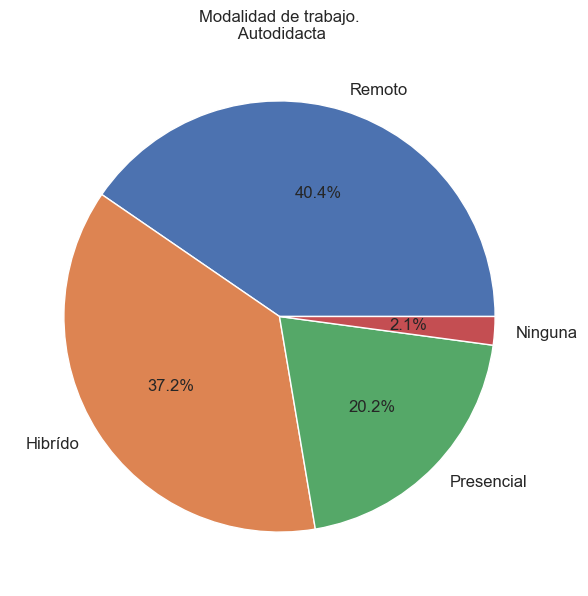

Educacion vs Modalidad - Autodidacta
Remoto        0.404255
Hibrído       0.372340
Presencial    0.202128
Ninguna       0.021277
Name: modalidad, dtype: float64








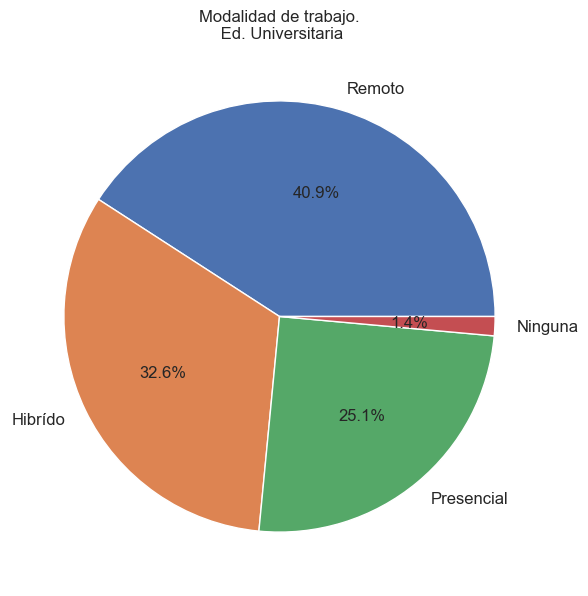

Educacion vs Modalidad - Ed. Universitaria
Remoto        0.408602
Hibrído       0.326165
Presencial    0.250896
Ninguna       0.014337
Name: modalidad, dtype: float64








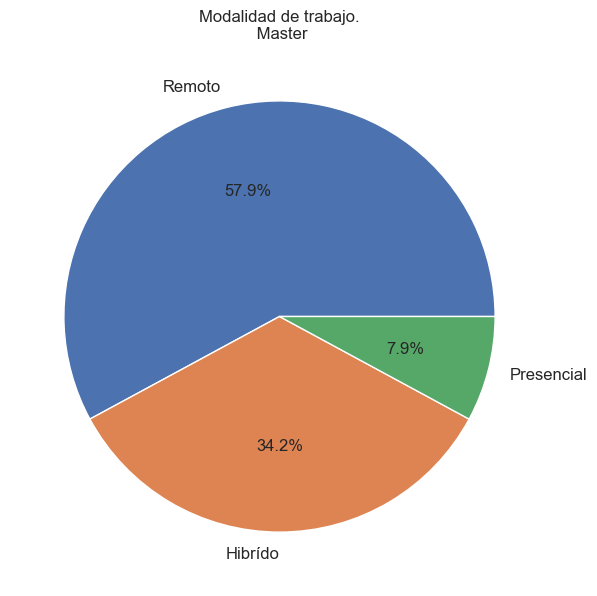

Educacion vs Modalidad - Master
Remoto        0.578947
Hibrído       0.342105
Presencial    0.078947
Name: modalidad, dtype: float64








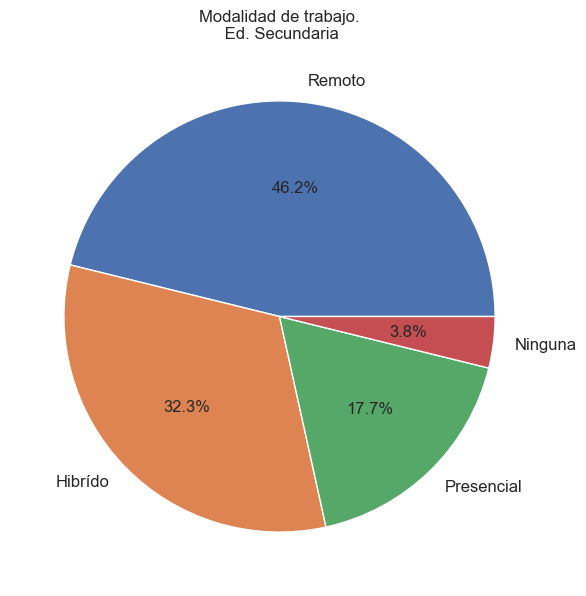

Educacion vs Modalidad - Ed. Secundaria
Remoto        0.461538
Hibrído       0.323077
Presencial    0.176923
Ninguna       0.038462
Name: modalidad, dtype: float64








In [32]:
plt.figure(figsize=(10, 20), dpi=80)

for k, v in enumerate(ed_uniques):
    # plt.subplot(20, 2, k + 1)
    ed_mod_df = df[df["educacion"].str.contains(v)]["modalidad"].value_counts(
        normalize=True
    )
    ed_mod_df.plot(
        kind="pie",
        title=f"Modalidad de trabajo.\n {v}",
        autopct="%1.1f%%",
        textprops={"fontsize": 12},
        ylabel="",
    )
    plt.show()
    print(f"Educacion vs Modalidad - {v}")
    print(ed_mod_df)
    print("\n" * 5)

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=1.5, wspace=0.4, hspace=0.4)

# Modalidad segun tipo de trabajo

In [33]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [34]:
tipo_trabajo_df = make_df(df, "tipo_de_trabajo", "categories", "count")

<AxesSubplot: >

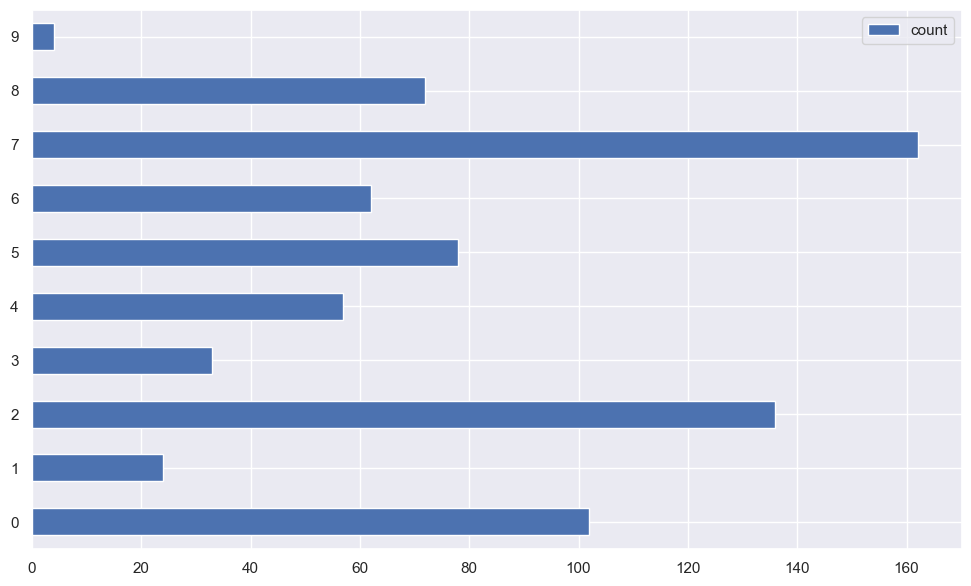

In [35]:
tipo_trabajo_df.plot(kind="barh")

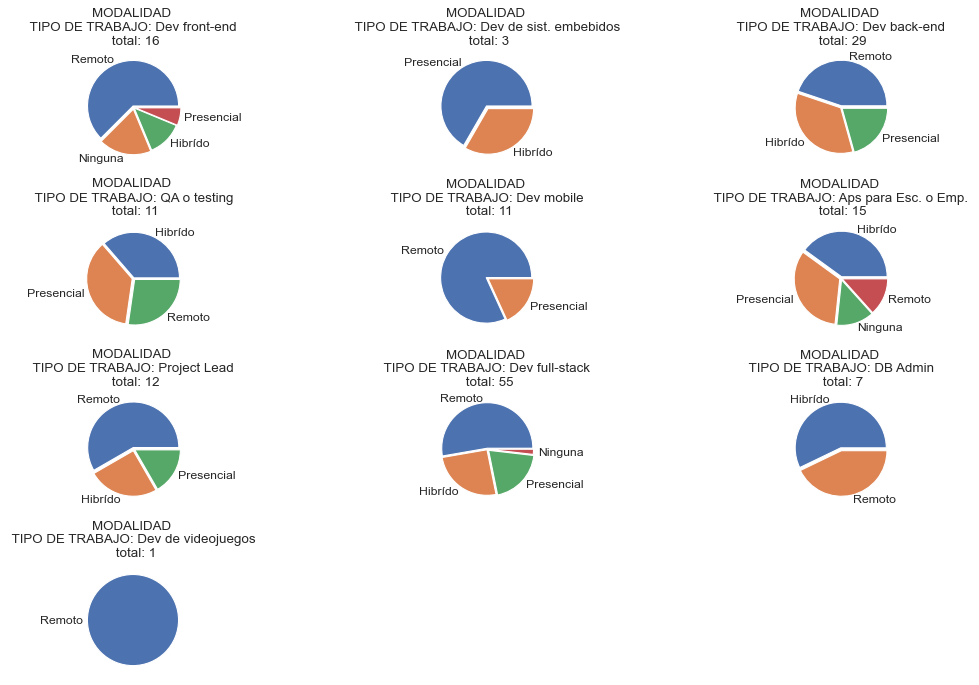

In [36]:
plt.figure(figsize=(15, 30), dpi=80)

for k, v in enumerate(tipo_trabajo_df.categories):
    plt.subplot(20, 3, k + 1)
    tt_df = df.loc[df["tipo_de_trabajo"] == v]["modalidad"].value_counts(normalize=True)
    tt_df.plot(
        kind="pie",
        title="MODALIDAD \n TIPO DE TRABAJO: {0} \n total: {1}".format(
            v, df.loc[df["tipo_de_trabajo"] == v].shape[0]
        ),
        label="",
        explode=explode_pie(tt_df.size)
        # color=color_neutro_dark
    )

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.5)

In [37]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

### MODALIDAD SEGUN EXPERIENCIA EN TI

In [40]:
exp_ti = df.groupby("exp_en_IT")

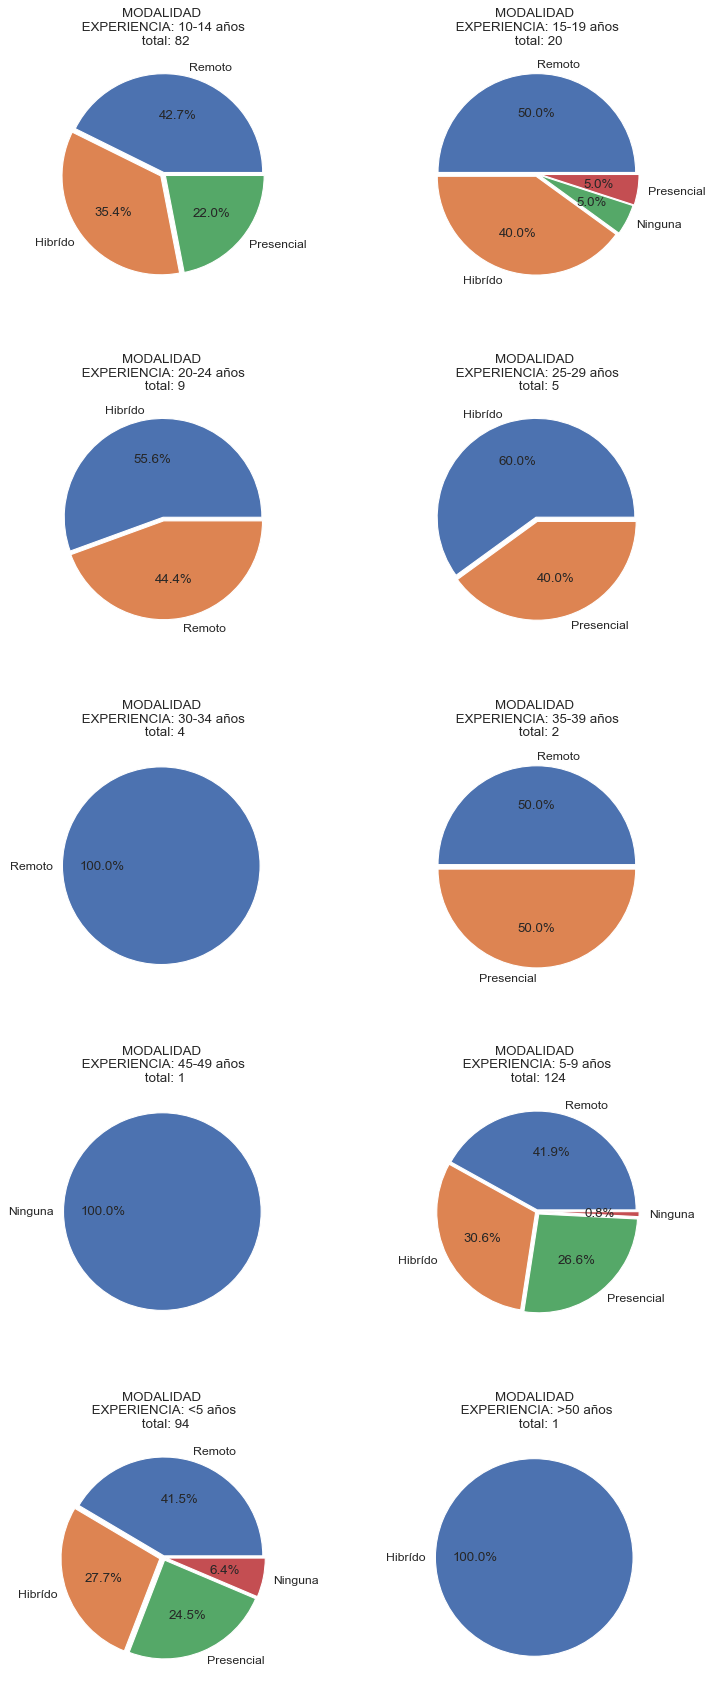

In [42]:
plt.figure(figsize=(10, 30), dpi=80)

for k, v in enumerate(exp_ti.groups.keys()):
    plt.subplot(10, 2, k + 1)
    mod_df = exp_ti.get_group(v)["modalidad"].value_counts(normalize=True)
    mod_df.plot(
        kind="pie",
        ylabel="",
        autopct="%1.1f%%",
        title="MODALIDAD \n EXPERIENCIA: {0} años \n total: {1}".format(
            v, exp_ti.get_group(v).shape[0]
        ),
        explode=explode_pie(mod_df.size)
        # color=color_neutro_dark
    )

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.4)